In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### 1. Below is a function that dictates the rule of conway's game of life.

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

In [2]:
def survival_rule(i1, i2, grid_coord, life_value, empty_grid):
    if grid_coord == 1:
        if (life_value<2 or life_value>3):
            empty_grid[i1][i2] = 0
        elif(life_value==2 or life_value==3):
            empty_grid[i1][i2] = 1
            
    elif grid_coord == 0:
        if (life_value ==3):
            empty_grid[i1][i2] = 1
        else:
            empty_grid[i1][i2] = 0


### 2. Creating a standard test set of co-ordinates so that our codes can be compared to already existing game

This website has two of this. In the preset menu on the right we can select 'glider' and 'circle of fire' and compare the result there with what is produced by this code.
https://academo.org/demos/conways-game-of-life/

In [3]:
# circle of fire coordienates
circle_of_fire = np.zeros((20,20))
rows = [6,7,8,9,11,12,13,14,5,5,6,6,7,7,8,8,8,8,8,8,10,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,13,13,14,14,15,15]
cols = [10,10,10,10,10,10,10,10,9,11,7,13,8,12,6,7,8,12,13,14,5,6,7,8,9,11,12,13,14,15,6,7,8,12,13,14,8,12,7,13,9,11]
circle_of_fire[rows,cols] = 1

# Glider grid co-ordinates
glider = np.zeros((20,20))
row_index = [9,9,10,10,11]
col_index = [8,10,9,10,9]
glider[row_index, col_index] = 1


### 3. This function below will return a new grid from current grid by calculated the suruvival chance of all the grid points based on the conways game of life rule.

In [4]:
def grid_calculate(mgrid):
    grid_size = mgrid.shape[0]
    zero_grid = np.zeros((grid_size,grid_size))

    for m in np.arange(grid_size):
        for n in np.arange(grid_size):
            i1 = m
            i2 = n
            test_coord = mgrid[i1][i2]
            if (i1==0 and i2==0):
                survival_value = mgrid[i1][i2+1]+mgrid[i1+1][i2]+mgrid[i1+1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(i1==0 and 0<i2<grid_size-1):
                survival_value = mgrid[i1][i2-1]+mgrid[i1][i2+1]+mgrid[i1+1][i2-1]+mgrid[i1+1][i2]+mgrid[i1+1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(i1==0 and i2==grid_size-1):
                survival_value = mgrid[i1][i2-1]+mgrid[i1+1][i2-1]+mgrid[i1+1][i2]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(0<i1<grid_size-1 and i2==0):
                survival_value = mgrid[i1-1][i2]+mgrid[i1-1][i2+1]+mgrid[i1][i2+1]+mgrid[i1+1][i2]+mgrid[i1+1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(i1==grid_size-1 and i2==0):
                survival_value = mgrid[i1-1][i2]+mgrid[i1-1][i2+1]+mgrid[i1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(i1==grid_size-1 and 0<i2<grid_size-1):
                survival_value = mgrid[i1-1][i2-1]+mgrid[i1-1][i2]+mgrid[i1-1][i2+1]+mgrid[i1][i2-1]+mgrid[i1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(i1==grid_size-1 and i2==grid_size-1):
                survival_value = mgrid[i1-1][i2-1]+mgrid[i1-1][i2]+mgrid[i1][i2-1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(0<i1<grid_size-1 and i2==grid_size-1):
                survival_value = mgrid[i1-1][i2-1]+mgrid[i1-1][i2]+mgrid[i1][i2-1]+mgrid[i1+1][i2-1]+mgrid[i1+1][i2]
                survival_rule(m, n, test_coord, survival_value, zero_grid)

            elif(0<i1<grid_size-1 and 0<i2<grid_size-1):
                survival_value = mgrid[i1-1][i2-1]+mgrid[i1-1][i2]+mgrid[i1-1][i2+1]+mgrid[i1][i2-1]+mgrid[i1][i2+1]+mgrid[i1+1][i2-1]+mgrid[i1+1][i2]+mgrid[i1+1][i2+1]
                survival_rule(m, n, test_coord, survival_value, zero_grid)


    mgrid = zero_grid
    return mgrid

### 4. Below we create animation by using above function to create several frames.

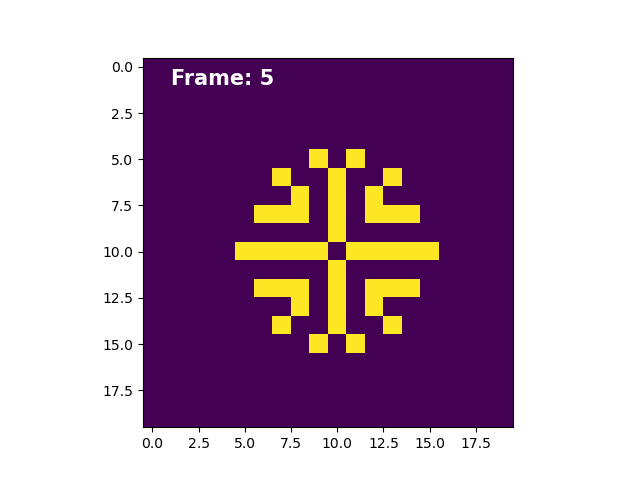

In [7]:
testset_data = circle_of_fire

fig, ax = plt.subplots()
ims = ax.imshow(testset_data)
text_object = ax.text(1,1, ' ', fontweight = 'bold', fontsize = 15, color = 'white')

def updatefig(frames):
    global testset_data
    if frames == 0:
        ims.set_array(testset_data)
        text_object.set_text(f'Frame: {frames+1}')

        
    else:
        data = grid_calculate(testset_data)
        ims.set_array(data)
        text_object.set_text(f'Frame: {frames+1}')
        testset_data = data
    return ims,

ani = animation.FuncAnimation(fig, updatefig, frames = 5, repeat = 'True', interval=200)
ani.save('conway.gif', writer = "pillow")